class_weight balanced

***Arrhythmia on ECG Classification***

In [1]:
# importar las librerias:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
from imblearn.over_sampling import SMOTE
import imblearn


warnings.filterwarnings('ignore')


In [2]:
# carga de los dataset:
train_df=pd.read_csv('mitbih_train.csv',header=None)
test_df=pd.read_csv('mitbih_test.csv',header=None)

In [3]:
# Dataset desvalanceados: 
X_train=train_df.iloc[:,:-1]
y_train=train_df.iloc[:,-1]

In [4]:
X_test=test_df.iloc[:,:-1]
y_test=test_df.iloc[:,-1]

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(87554, 187)
(87554,)
(21892, 187)
(21892,)


In [6]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

**1.Random Forest**

***1.3 Class Weight datos totales***

In [7]:
rf_class_weight = RandomForestClassifier(random_state=42, class_weight='balanced')
# train classifier
rf_class_weight = rf_class_weight.fit(X_train, y_train)
# make predictions on train data
rf_class_weight_pred_train = rf_class_weight.predict(X_train)
# make predictions on test data
rf_class_weight_pred = rf_class_weight.predict(X_test)
print(accuracy_score(y_test, rf_class_weight_pred))
print()
print(classification_report(y_test,rf_class_weight_pred))

0.9709482916133747

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18118
           1       0.97      0.58      0.72       556
           2       0.99      0.86      0.92      1448
           3       0.84      0.58      0.69       162
           4       1.00      0.94      0.97      1608

   micro avg       0.98      0.97      0.97     21892
   macro avg       0.95      0.79      0.86     21892
weighted avg       0.97      0.97      0.97     21892
 samples avg       0.97      0.97      0.97     21892



In [8]:
import pickle
# Save the model as a pickle
import pickle
filename = './modelos/rf_class_weight.pkl'
pickle.dump(rf_class_weight, open(filename, 'wb'))


In [9]:
# matriz de confución normalizada:
import itertools


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Normalized confusion matrix


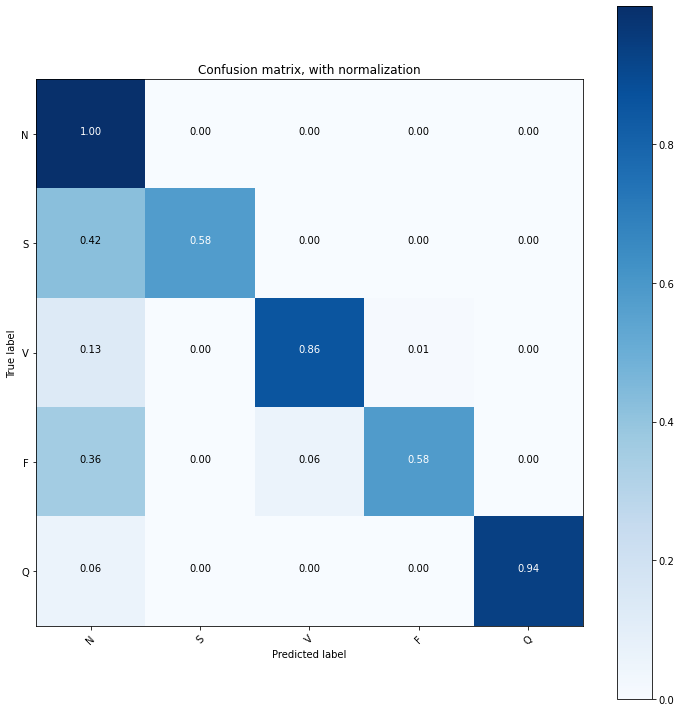

In [10]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(
    y_test.argmax(axis=1), rf_class_weight_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'], normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()
